# Teste com reações quimicas utilizando SMARTS


In [ ]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  #faz aparecer o desenho
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
# for flattening tuples and lists
from itertools import chain
print(rdkit.__version__)

2022.03.5


In [ ]:
ethanol = Chem.MolFromSmiles('CCO')
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

alcohols = [ethanol, isopropanol, phenol, t_butanol, glycerol]

In [ ]:
# helper functions to avoid typing the same thing over and over
def to_smiles(mol_tuple):
    return tuple(Chem.MolToSmiles(mol) for mol in mol_tuple)

def from_smiles(smiles_tuple):
    return tuple(Chem.MolFromSmiles(smiles) for smiles in smiles_tuple)

Number of unique product sets: 5


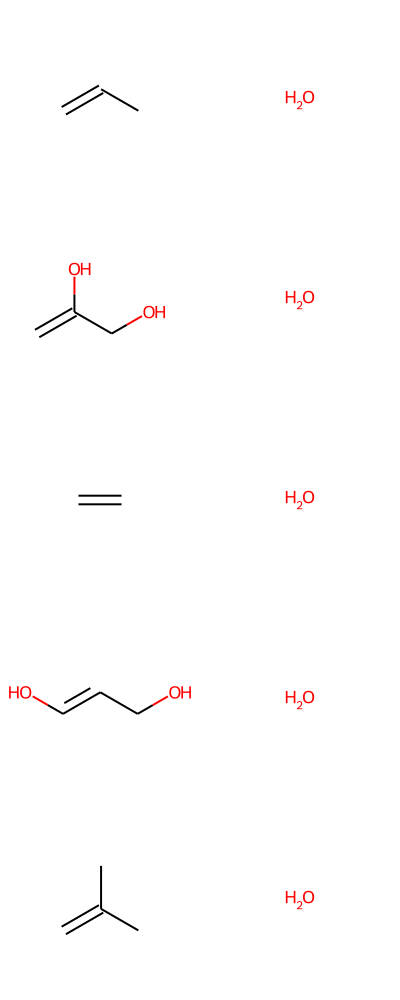

In [ ]:
water_elimination_smarts = '[C!H0:1][C:2][O:3]>>[C:1]=[C:2].[O:3]'
water_elimination = AllChem.ReactionFromSmarts(water_elimination_smarts)

# do the reaction on every alcohol in our set
all_products_tuples = [water_elimination.RunReactants((mol, )) for mol in alcohols]
all_products = chain.from_iterable(all_products_tuples)

# convert to smiles and back to keep only unique products
all_products_smiles = [to_smiles(mol_tuple) for mol_tuple in all_products]
all_products_unique = [from_smiles(smiles_tuple) for smiles_tuple in set(all_products_smiles)]
nProductSets = len(all_products_unique)
print("Number of unique product sets:",nProductSets)

# draw each product set on its own line
prod_tpl = tuple(chain(*all_products_unique))
Draw.MolsToGridImage(prod_tpl,molsPerRow=water_elimination.GetNumProductTemplates())

Como esperado, cada reação produz dois compostos, um dos quais é a água. Como antes, o glicerol dá origem a dois produtos únicos. O fenol não reage porque não corresponde à nossa regra de reação, que especifica carbonos alifáticos. Ao contrário da reação de oxidação, o t-butanol reage, pois agora corresponde à regra da reação, formando isobutileno.


In [ ]:
rxn_1 = AllChem.ReactionFromSmarts('[#6:1][O:2]>>[#6:1]=[O:2]')

In [ ]:
rxn_1.RunReactants((isopropanol, ))

((<rdkit.Chem.rdchem.Mol at 0x7f9ca9a8e2d0>,),)

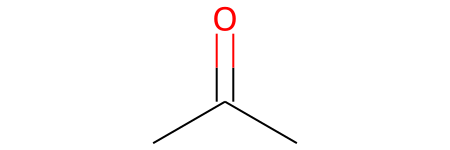

In [ ]:
rxn_1.RunReactants((isopropanol, ))[0][0]

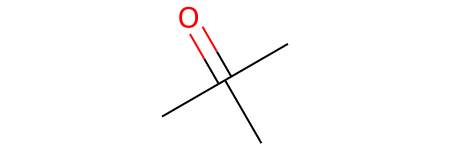

In [ ]:
rxn_1.RunReactants((t_butanol, ))[0][0]

In [ ]:
p = rxn_1.RunReactants((isopropanol, ))[0][0]
Chem.SanitizeMol(p)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [ ]:
p = rxn_1.RunReactants((t_butanol, ))[0][0]

try:
    Chem.SanitizeMol(p)
except ValueError:
    print('Sanitization FAILED!')

Sanitization FAILED!


In [ ]:
gp = list(chain.from_iterable(rxn_1.RunReactants((glycerol, ))))
[Chem.SanitizeMol(mol) for mol in gp]

[rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE]

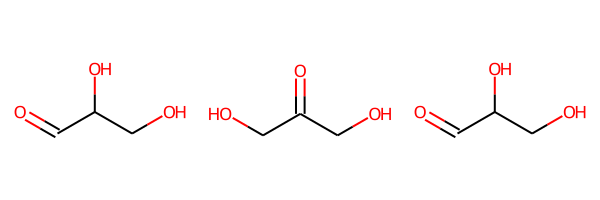

In [ ]:
Draw.MolsToGridImage(gp)

In [ ]:
if gp[1] == gp[2]:
  flag = True
else:
  flag = False


print(flag)

False
